In [1]:
import os
import pickle
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.metrics import auc
%matplotlib notebook

In [29]:
precisions_dict_path = "/mnt/data/Odysseas/Validation_Eval/theo_icarus/precision_dict.pkl"
recalls_dict_path = "/mnt/data/Odysseas/Validation_Eval/theo_icarus/recall_dict.pkl"
scores_dict_path = "/mnt/data/Odysseas/Validation_Eval/theo_icarus/scores_dict.pkl"

pr_file = open(precisions_dict_path, "rb")
pr_dict = pickle.load(pr_file)
pr_file.close()
re_file = open(recalls_dict_path, "rb")
re_dict = pickle.load(re_file)
re_file.close()
score_file = open(scores_dict_path, "rb")
score_dict = pickle.load(score_file)
score_file.close()

<IPython.core.display.Javascript object>


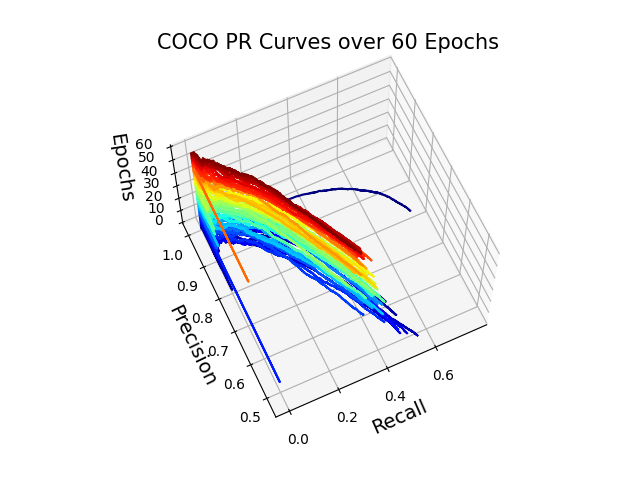

<IPython.core.display.Javascript object>


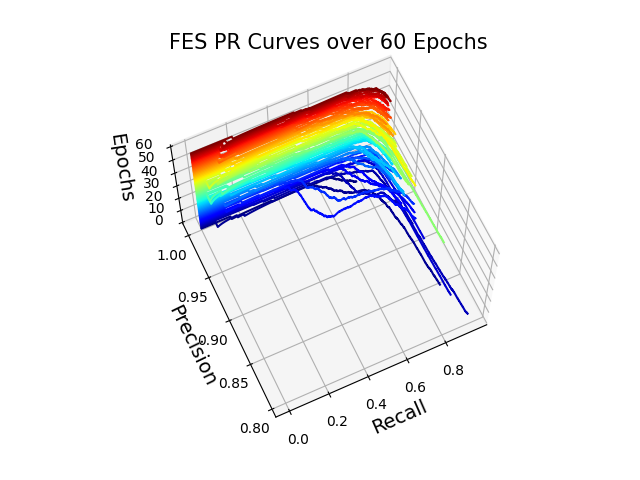

<IPython.core.display.Javascript object>


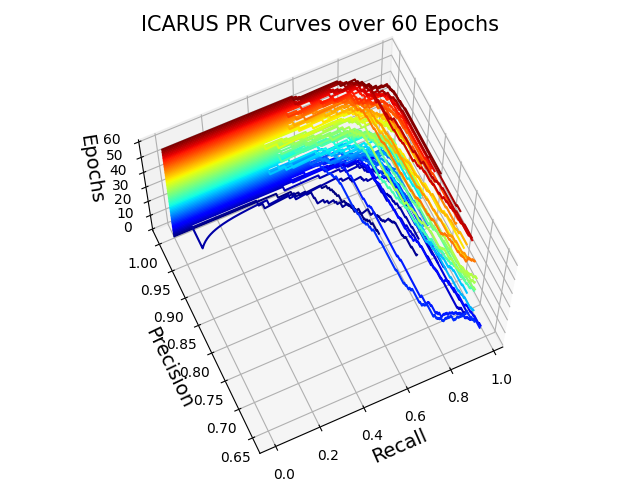

<function matplotlib.pyplot.show(block=None)>

In [30]:
%matplotlib notebook
cmap = plt.get_cmap("jet", 61)
datasets =["COCO", "FES", "ICARUS"]
for idx,sets in enumerate(datasets): 
    fig = plt.figure(idx)
    ax = fig.add_subplot(projection="3d")
    for i in range(len(pr_dict[sets])):
        ax.plot(re_dict[sets][i],pr_dict[sets][i], i, color=cmap(i) ,label=f"Epoch {i}")
        ax.set_title(f"{sets} PR Curves over 60 Epochs", fontsize=15)
        ax.set_xlabel("Recall", fontsize=14)
        ax.set_ylabel("Precision", fontsize=14)
        ax.set_zlabel("Epochs", fontsize=14)
        ax.view_init(65,-115)
plt.tight_layout()
plt.grid()
plt.show


0.73
0.429
0.438
0.43
0.387
0.404
0.389
0.387
0.387
0.368
0.348
0.312
0.328
0.348
0.336
0.37
0.379
0.339
0.332
0.34
0.356
0.356
0.348
0.347
0.332
0.362
0.344
0.311
0.353
0.331
0.328
0.34
0.285
0.346
0.352
0.347
0.345
0.326
0.351
0.354
0.331
0.33
0.323
0.297
0.337
0.308
0.329
0.32
0.336
0.338
0.348
0.311
0.326
0.318
0.318
0.316
0.322
0.323
0.316
0.314
0.304
endCOCO
0.774
0.886
0.913
0.931
0.909
0.921
0.932
0.894
0.9
0.912
0.926
0.925
0.888
0.882
0.903
0.893
0.924
0.899
0.898
0.904
0.908
0.916
0.905
0.889
0.912
0.923
0.904
0.923
0.93
0.906
0.916
0.911
0.891
0.917
0.922
0.919
0.909
0.907
0.905
0.894
0.91
0.917
0.917
0.892
0.887
0.893
0.891
0.905
0.899
0.901
0.908
0.894
0.901
0.91
0.912
0.912
0.908
0.914
0.917
0.915
0.907
endFES
0.785
0.869
0.911
0.946
0.935
0.95
0.942
0.95
0.946
0.907
0.885
0.921
0.94
0.941
0.954
0.949
0.942
0.939
0.927
0.932
0.95
0.951
0.947
0.946
0.951
0.958
0.928
0.944
0.925
0.931
0.938
0.929
0.916
0.922
0.941
0.944
0.949
0.944
0.945
0.937
0.944
0.954
0.946
0.945
0.939

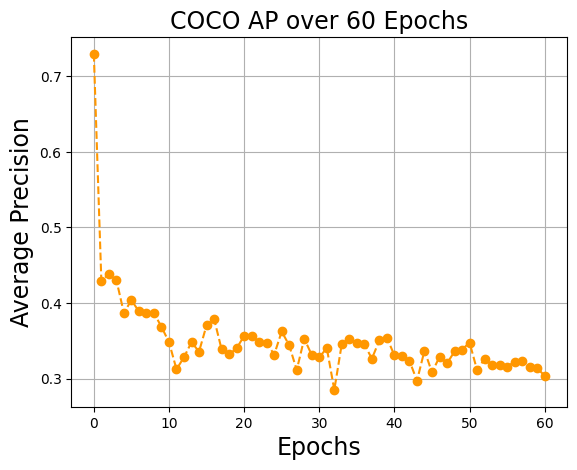

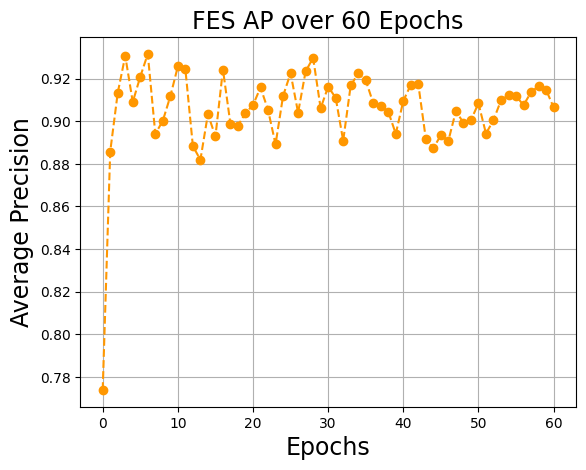

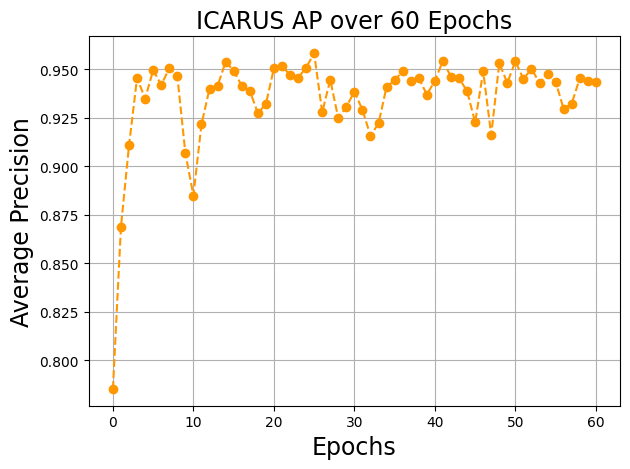

In [31]:
%matplotlib inline
cmap = plt.get_cmap("jet", 61)
datasets =["COCO", "FES", "ICARUS"]
for idx,sets in enumerate(datasets): 
    fig1 = plt.figure(idx)
    ax1 = fig1.add_subplot(1,1,1)
    scores = []
    for i in range(len(pr_dict[sets])):
        score = auc(re_dict[sets][i],pr_dict[sets][i])
        scores.append(score)
        print(np.round(score,3))
    print(f"end{sets}")
    ax1.plot(np.arange(61),scores, "o--", c=cmap(i-15))
    ax1.set_title(f"{sets} AP over 60 Epochs", fontsize=17)
    ax1.set_xlabel("Epochs", fontsize=17)
    ax1.set_ylabel("Average Precision", fontsize=17)
    plt.grid()
    plt.savefig(f"{sets}_AP", bbox_inches="tight")
plt.tight_layout()
plt.show()
